In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from taz_scripts import preprocess
import math
# plt.style.use("ggplot")

# Purpose
- we want to take a look at how transportation changes between the two futures we have access to.

Our keys are: 
- b = bus
- brt = bus rapid transit
- lrt = light rail transit (muni trains)
- bart = bart
- cr = commuter rail (caltrain)


We are making a few assumptions:
- Transportation or `transit_type` is defined by public transportation 
- Since all buildings are unique in the dataset and that buildings may be accessible by more than 1 transportation method, we will assume that the closest form of transporation is the one that is counted for a particular building
- We should assume there is some threshold of distance from this building where it would be counted as not accesible by transportation
    - This should underestimate the accessibilty for a building and the number of routes to a building and affect what is considered more accessible than something else.  
    - Instead we can look at a measure of accessibilty in the entire region as a measure of the buildings relative accessibility


Logistical Questions:
- Since we only have 1 unique ID per each 


Some questions we'd like to answer include:

- What regions are more heavily impacted by the lack of transportation access?
    - we can look at the counts of buildings that are accessible by transportation at taz and county levels
    - which regions, at the taz and county level are not accessible by transportaiton
    - what types of transportation connect these buildings
- how are income and transportation accessibility (types and number of options) correlated?
    - there is no explicit income column, we may use rent, house prices as a proxy
    - if we see a positive correlation between wealth and transportation, this could be problematic since public transportation is supposed to benefit low income.  Demand issue in that wealthier people may want to live closer to public transportation for convenience and push out the lower income people.
- How has housing development changed, what types of 
    - do we see evidence of gentrification (ex the age of the buildings changing) as a function of changes in transportation types?
    - `displacement_risk`
    - what kinds of business and concentration of these buildings do we see and how does that vary with transportation changes?
        - for example, do we see an increase in transportation or accessible buildings, look at `general_type` 
    - may be difficult
- How does office spaces mean for 
    - we can compare residential and housing amounts with the amount of jobs in the area
    - look at the expected per person job sqft (num projected/office spaces)
        - this may give us a better idea of commuters into the area
    - we can fit more people in offices, much higher density in an office building, more people might be taking those as opposed to residential areas


We would also like to look at trends over time, both within the futures, and across futures.
- how are different regions connected and how does that change over time?  
- Does BART connect more and more people together?
- How does the primary form of transportation for regions change over time?
- 

Other considerations
- people go 1 way or another in the morning, ex people go to work and come back in large waves towards in a similar direction
- difficult because we need the same lanes, or trains need to go one way and then back the other
- one solution made today is the BART express trains
- better for office and residential area concnetration to alleviate this issue.  This could be one thing to see. 
    - look at concentrations of offices in which areas they could be.  


Outside Data:
- projected CPI
- projected population by counties
- expected BART, MUNI, Caltrain, Capital Corridor, VTA expansion

Before zoning systems, there were deeds.  When you buy a property, there are restrictions on what you can build.  Basically privatized zoning.  Comes from developers.  
- could potentially limit development in those areas
- or looking at the number of deeds as time increases, per region

## Create a template for Comparing Transportation Futures Between 2015 datasets


In [3]:
clean_green_buildings_2015 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2015.csv")
rising_tides_buildings_2015 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2015.csv")

Rename `zone_id` to `taz`, assuming that the two are equivalent

In [4]:
clean_green_buildings_2015 = clean_green_buildings_2015.rename(columns={"zone_id": "taz"})
rising_tides_buildings_2015 = rising_tides_buildings_2015.rename(columns={"zone_id": "taz"})

In [5]:
preprocess(clean_green_buildings_2015)

preprocess(rising_tides_buildings_2015)

In [6]:
clean_green_buildings_2015.head(5)


,building_id,parcel_id,residential_units,residential_sqft,non_residential_sqft,building_sqft,stories,year_built,redfin_sale_price,redfin_sale_year,...,taz,general_type,job_spaces,historic,is_sanfran,sqft_per_unit,county_name,county_value,subregion_name,subregion_value
0,1,742974,1.0,2029.0,0.0,2029.42425,1.0,1945,NaN,2012.0,...,1434,Residential,0,0,0,2029.42425,Marin,9,North Bay,5
1,2,744961,1.0,2029.0,0.0,2029.42425,1.0,1965,NaN,2012.0,...,1417,Residential,0,0,0,2029.42425,Marin,9,North Bay,5
2,3,1442641,1.0,1568.0,0.0,1568.00000,1.0,1964,NaN,2012.0,...,459,Residential,0,0,0,1568.00000,Santa Clara,3,South Bay,3
3,4,190969,0.0,0.0,1595.0,1595.00000,2.0,1992,340000.0,2003.0,...,846,Residential,4,0,0,1595.00000,Alameda,4,East Bay,4
4,5,308709,0.0,0.0,1513.0,1513.00000,1.0,1978,442000.0,2004.0,...,776,Residential,4,0,0,1513.00000,Alameda,4,East Bay,4


In [7]:
rising_tides_buildings_2015.head(5)

,building_id,parcel_id,residential_units,residential_sqft,non_residential_sqft,building_sqft,stories,year_built,redfin_sale_price,redfin_sale_year,...,taz,general_type,job_spaces,historic,is_sanfran,sqft_per_unit,county_name,county_value,subregion_name,subregion_value
0,1,742974,1.0,2029.0,0.0,2029.42425,1.0,1945,NaN,2012.0,...,1434,Residential,0,0,0,2029.42425,Marin,9.0,North Bay,5.0
1,2,744961,1.0,2029.0,0.0,2029.42425,1.0,1965,NaN,2012.0,...,1417,Residential,0,0,0,2029.42425,Marin,9.0,North Bay,5.0
2,3,1442641,1.0,1568.0,0.0,1568.00000,1.0,1964,NaN,2012.0,...,459,Residential,0,0,0,1568.00000,Santa Clara,3.0,South Bay,3.0
3,4,190969,0.0,0.0,1595.0,1595.00000,2.0,1992,340000.0,2003.0,...,846,Residential,4,0,0,1595.00000,Alameda,4.0,East Bay,4.0
4,5,308709,0.0,0.0,1513.0,1513.00000,1.0,1978,442000.0,2004.0,...,776,Residential,4,0,0,1513.00000,Alameda,4.0,East Bay,4.0


`transit_type` column exists in both Clean and Green and Rising Tides Futures

In [8]:
print("transit_type" in clean_green_buildings_2015.columns)
print("transit_type" in rising_tides_buildings_2015.columns)


True
True


In [9]:
clean_green_buildings_2015.columns

Index(['building_id', 'parcel_id', 'residential_units', 'residential_sqft',
       'non_residential_sqft', 'building_sqft', 'stories', 'year_built',
       'redfin_sale_price', 'redfin_sale_year', 'building_type',
       'non_residential_rent', 'deed_restricted_units', 'residential_price',
       'price_per_sqft', 'lot_size_per_unit', 'vacant_residential_units',
       'combo_logsum', 'juris_ave_income', 'sqft_per_job', 'unit_price',
       'vacant_job_spaces', 'vacant_res_units', 'building_age', 'tmnode_id',
       'new_construction', 'cnml', 'transit_type', 'vmt_res_cat', 'node_id',
       'modern_condo', 'cml', 'taz', 'general_type', 'job_spaces', 'historic',
       'is_sanfran', 'sqft_per_unit', 'county_name', 'county_value',
       'subregion_name', 'subregion_value'],
      dtype='object')

In [10]:
clean_green_buildings_2015.groupby("county_name").sum()["deed_restricted_units"]/ clean_green_buildings_2015.groupby("county_name").count()["deed_restricted_units"]

county_name
San Francisco    0.163537
San Mateo        0.028192
Santa Clara      0.064995
Alameda          0.064849
Contra Costa     0.049329
Solano           0.039378
Napa             0.039040
Sonoma           0.048168
Marin            0.027676
Others           0.040193
Name: deed_restricted_units, dtype: float64

SF is older, so maybe has more relatively speaking

In [11]:
clean_green_buildings_2015.groupby("county_name").sum()["deed_restricted_units"]

county_name
San Francisco    24538.0
San Mateo         5111.0
Santa Clara      27393.0
Alameda          24135.0
Contra Costa     14775.0
Solano            5017.0
Napa              1846.0
Sonoma            7407.0
Marin             1565.0
Others            1386.0
Name: deed_restricted_units, dtype: float64

In [12]:
clean_green_buildings_2015.groupby("county_name").count()["deed_restricted_units"]

county_name
San Francisco    150046
San Mateo        181290
Santa Clara      421461
Alameda          372170
Contra Costa     299517
Solano           127407
Napa              47285
Sonoma           153773
Marin             56548
Others            34484
Name: deed_restricted_units, dtype: int64

alameda and Santa Clara county has just more buildings

## All forms of public transportation as delineated by MTC:
- meanings are still unclear

In [13]:
sorted(clean_green_buildings_2015["transit_type"].unique())

['b1',
 'b2',
 'b3',
 'bart1',
 'bart2',
 'bart3',
 'brt1',
 'brt2',
 'brt3',
 'cr2',
 'cr3',
 'cr4',
 'lrt1',
 'lrt2',
 'lrt3',
 'none']

In [14]:
for i in sorted(clean_green_buildings_2015["transit_type"].unique()):
    if i == 'b1' or i == 'b2' or i == 'b3':
        print(i + ": Bus")
    elif i == 'bart3' or i == 'bart1' or i == 'bart2' or i == "bart3":
        print(i + ": BART")
    elif i == 'brt1' or i == "brt2" or i == 'brt3':
        print(i + ": Bus Rapid Transit")
    elif i == 'cr2' or i =="cr3" or i == 'cr4':
        print(i + ": Commuter Rail")
    elif i == 'lrt1' or i == 'lrt2' or i=='lrt3':
        print(i + ": Muni Light Rail")
        
    else:
        print(i)

b1: Bus
b2: Bus
b3: Bus
bart1: BART
bart2: BART
bart3: BART
brt1: Bus Rapid Transit
brt2: Bus Rapid Transit
brt3: Bus Rapid Transit
cr2: Commuter Rail
cr3: Commuter Rail
cr4: Commuter Rail
lrt1: Muni Light Rail
lrt2: Muni Light Rail
lrt3: Muni Light Rail
none


### Checking to see if there are duplicates in building id to see if multiple transportation options are available

In [15]:
len(clean_green_buildings_2015["building_id"].unique())


1843981

In [16]:
clean_green_buildings_2015.shape[0]

1843981

No duplicates of building ids exist, tells us that we don't list all possible transportation options to a building.

## Other Basic Information

In [17]:
print("There exists " + str(len(clean_green_buildings_2015["taz"].unique())) + " unique TAZ regions")

There exists 1454 unique TAZ regions


These are all the counties in the Bay Area:

In [18]:
for i in clean_green_buildings_2015["county_name"].unique():
    print(i)

Marin
Santa Clara
Alameda
Contra Costa
Others
Sonoma
Napa
San Francisco
San Mateo
Solano


These are all the subregions in the Bay Area:

In [19]:
for i in clean_green_buildings_2015["subregion_name"].unique():
    print(i)

North Bay
South Bay
East Bay
Others
San Francisco
Peninsula


## bar chart by region to look at unique transportation lines and concentration of them

columns used: `is_sanfran`, `transit type`, `subregion_name`, `county_name`

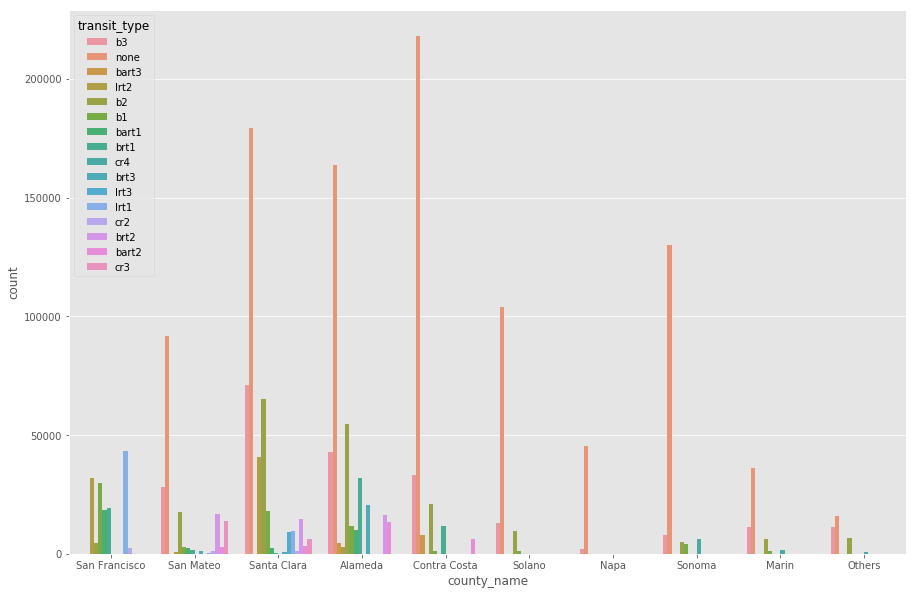

In [20]:
#counts
plt.figure(figsize=(15, 10))
sns.countplot(x="county_name", hue="transit_type", data = clean_green_buildings_2015)

- Napa has no connections, is an isolated pupper
    - SMART has no access there

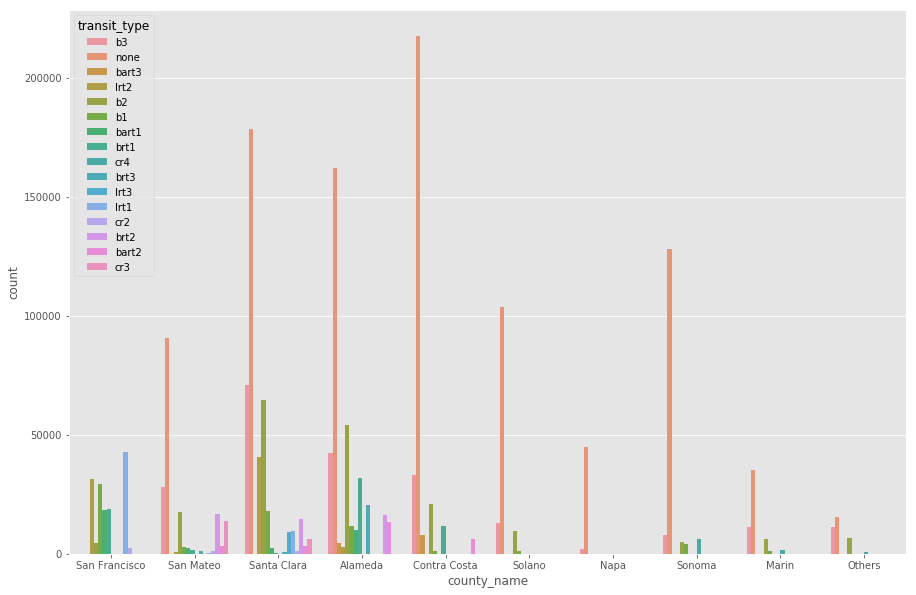

In [21]:
#counts
plt.figure(figsize=(15, 10))
sns.countplot(x="county_name", hue="transit_type", data = rising_tides_buildings_2015)

Use a TVD metric to measure differences betwen Rising Tides and Clean and Green

In [22]:
def tvd(df1, df2, county):
    all_transit_types = pd.DataFrame(clean_green_buildings_2015["transit_type"].unique()).rename(columns={0: "transit_type"})
    join_group1 = (df1[df1["county_name"] == county].groupby("transit_type").count() / 
                   df1[df1["county_name"] == county].shape[0]).reset_index().merge(all_transit_types, how="outer").fillna(0)
    join_group2 = (df2[df2["county_name"] == county].groupby("transit_type").count() / 
                   df2[df2["county_name"] == county].shape[0]).reset_index().merge(all_transit_types, how="outer").fillna(0)
    return sum(abs(join_group1["building_id"] - join_group2["building_id"])) * 0.5



In [23]:
def calc_tvd_counties(df1, df2):
    tvds = pd.DataFrame(columns = ["county", "TVD"])
    count = 0
    for i in df1["county_name"].unique():
        vals = [i, tvd(df1, df2, i)]
        tvds.loc[count] = vals
        count += 1
    return tvds

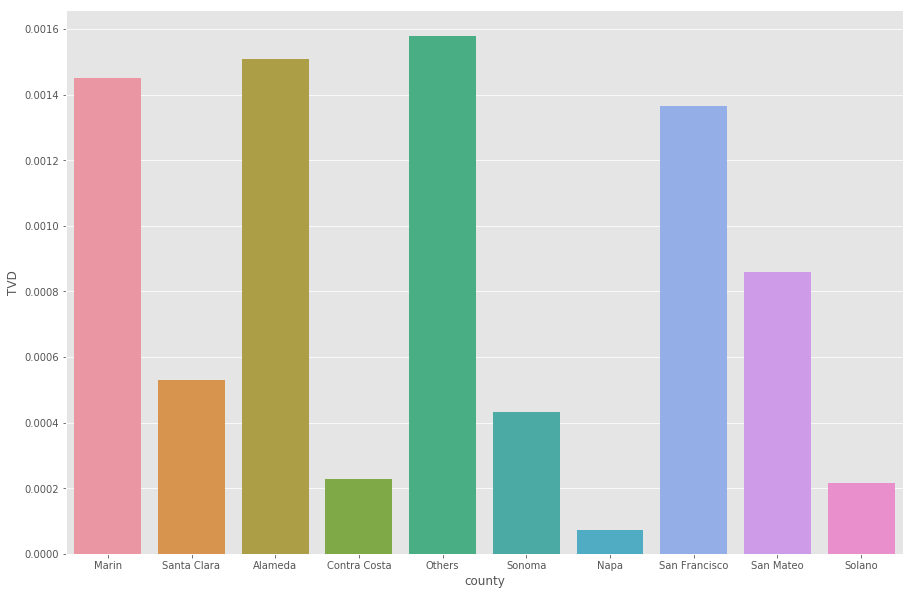

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x="county", y="TVD", data = calc_tvd_counties(clean_green_buildings_2015, rising_tides_buildings_2015))

In [25]:
#percentages of each subgroup

In [26]:
#standardize colors

In [27]:
def percentage_comprising(df):
    df_merged = df.groupby(["county_name", "transit_type"]).count()[["building_id"]].reset_index().merge(
    df.groupby("county_name").count()[["building_id"]], on="county_name", how="left")
    df_merged["percent"] = 100 * df_merged["building_id_x"]/df_merged["building_id_y"]
    
    df_merged["building_id_x"] = df_merged["building_id_x"].fillna(0)
    df_merged["building_id_y"] = df_merged["building_id_y"].fillna(0)
    df_merged["percent"] = df_merged["percent"].fillna(0)
    return df_merged

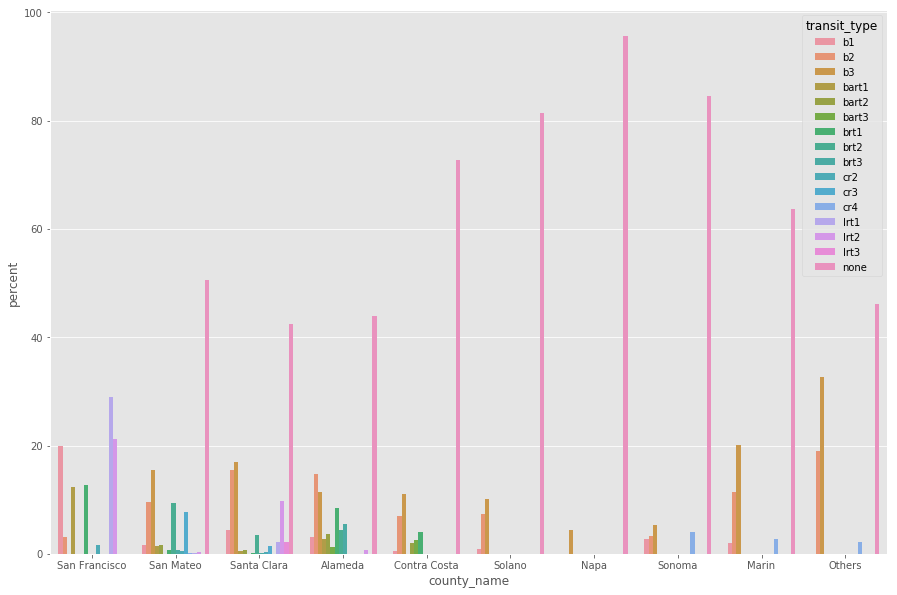

In [28]:
#look at percentages
plt.figure(figsize=(15, 10))
sns.barplot(x="county_name", y="percent", hue="transit_type", data = percentage_comprising(clean_green_buildings_2015))

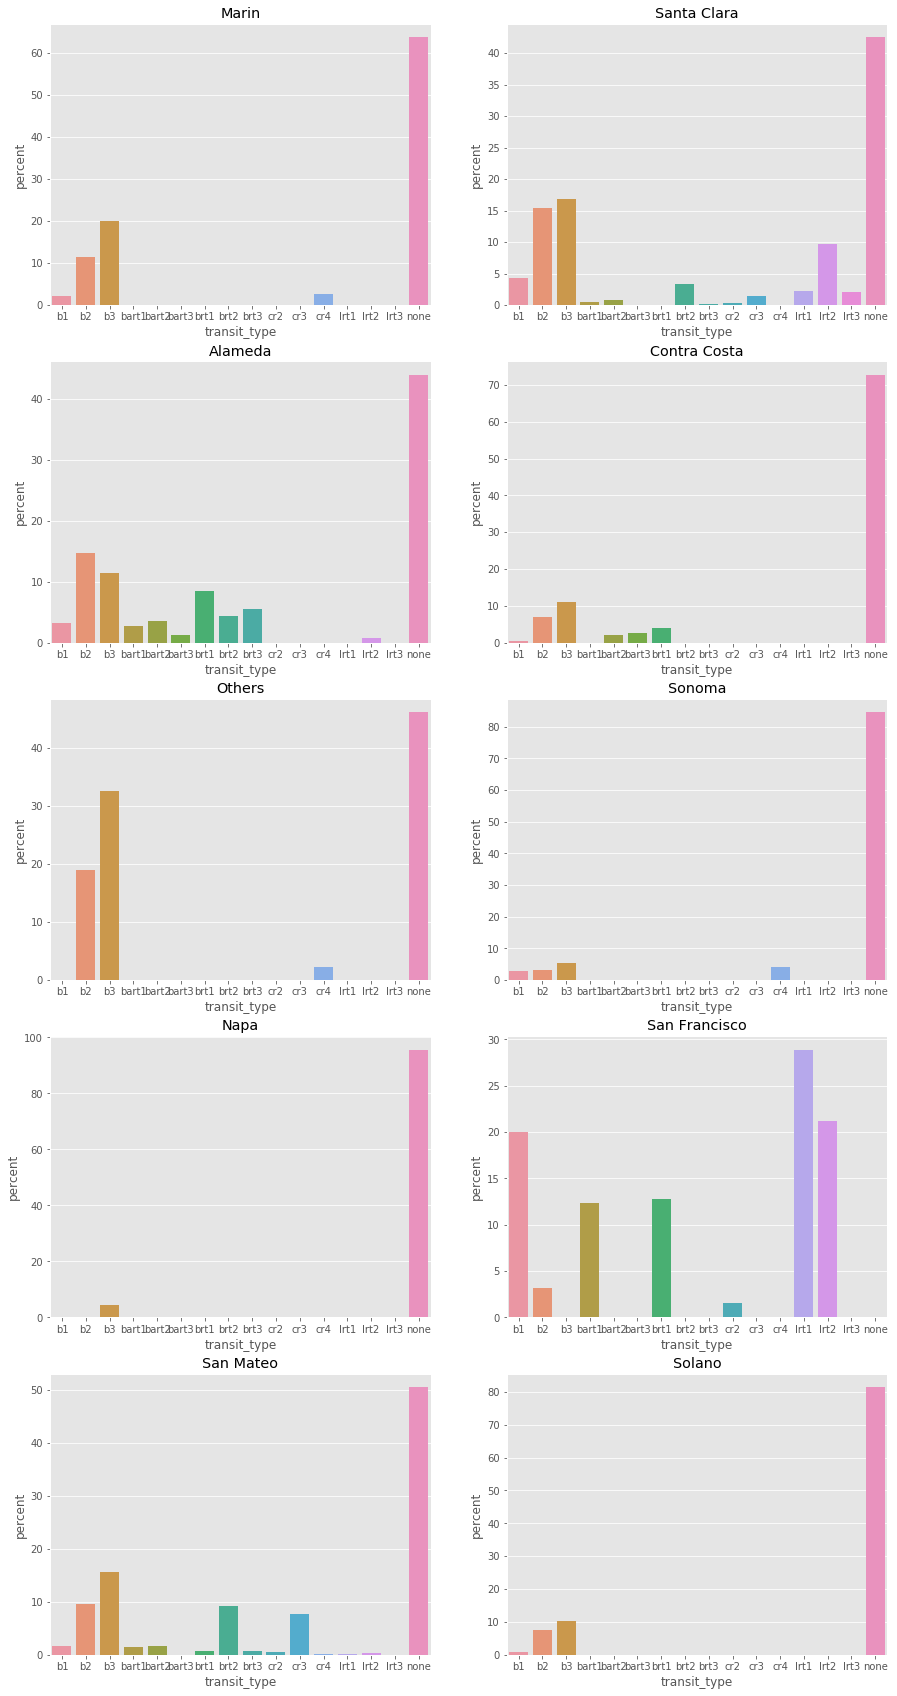

In [29]:
percent_county_data = percentage_comprising(clean_green_buildings_2015)
plt.subplots(5, 2, figsize=(15,30));
counties = clean_green_buildings_2015["county_name"].unique()
for i in np.arange(0, 10):
    ax1 = plt.subplot(5, 2, i+ 1)
    sns.barplot(x="transit_type", y="percent", data = percent_county_data[percent_county_data["county_name"] == counties[i]], ax=ax1)
    ax1.set_title(counties[i])

# Possible Explanation for Transportation Naming Scheme
- exists only 3 categories for each type of transportation
- cold denote relative distance to nearest stop from a building.
- we see that there is a high number of 3s and 4s ending transit lines in sparser areas like Sonoma and Napa.
- In SF and Alameda, we see less 3s and 4s

### Observations
- `None` gives a lot of information for us.  
- San Francisco, with a dense population and urban layout, is almost completely well connected
- Santa Clara, Contra Costa, Alameda
- Sonoma may be covered by SMART and ferry ridership instead, that isn't covered in there.

In [30]:
#look at counts for specific types of transportation

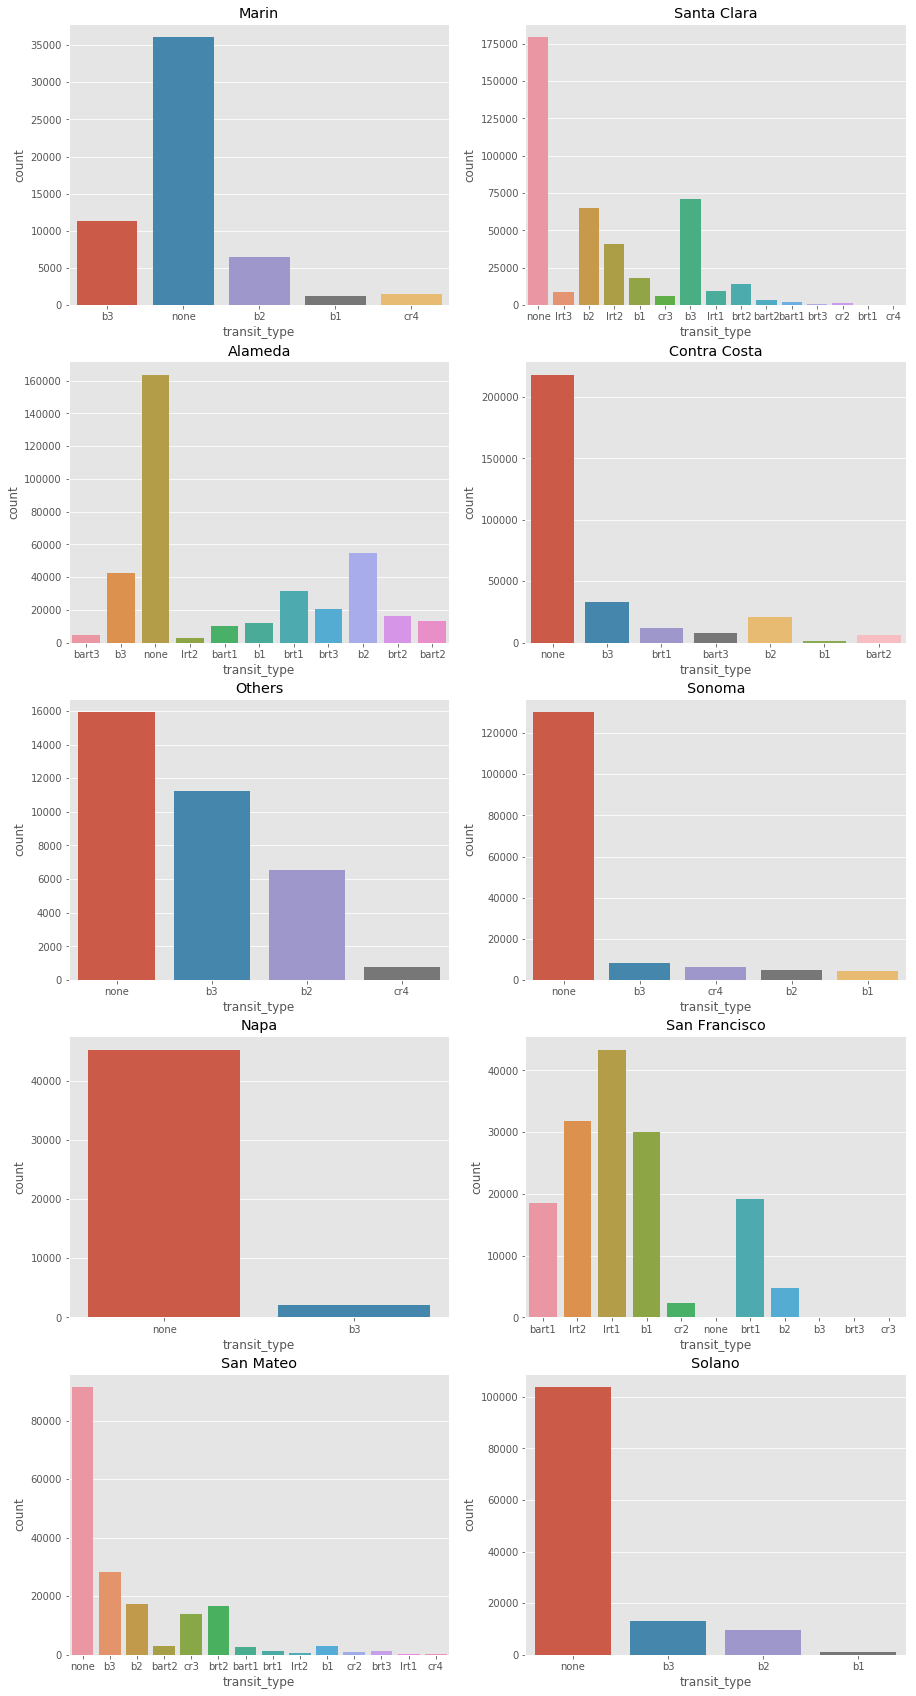

In [31]:
plt.subplots(5, 2, figsize=(15,30));
counties = clean_green_buildings_2015["county_name"].unique()
for i in np.arange(0, 10):
    ax1 = plt.subplot(5, 2, i+ 1)
    sns.countplot(x="transit_type", data = clean_green_buildings_2015[clean_green_buildings_2015["county_name"] == counties[i]], ax=ax1)
    ax1.set_title(counties[i])

In [32]:
#look at counts for each type of transit across counties or zones

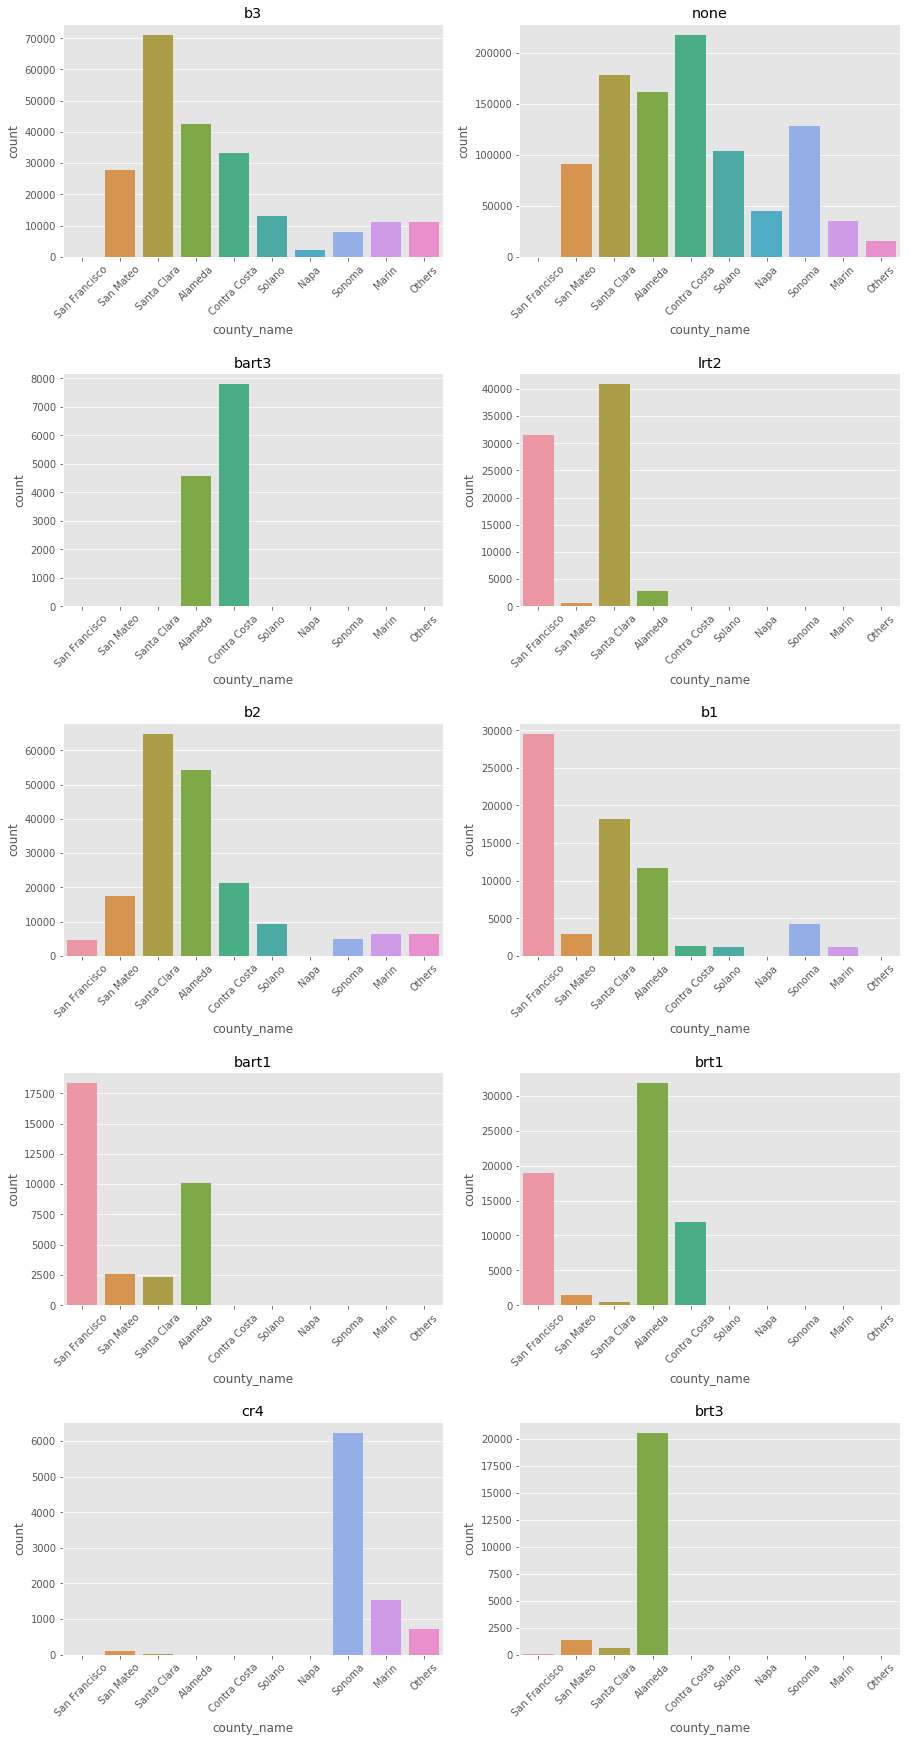

In [44]:
plt.subplots(5, 2, figsize=(15,30));
plt.subplots_adjust(hspace=0.5)
transits = rising_tides_buildings_2015["transit_type"].unique()
for i in np.arange(0, 10):
    ax1 = plt.subplot(5, 2, i+ 1)
    sns.countplot(x="county_name", data = rising_tides_buildings_2015[rising_tides_buildings_2015["transit_type"] == transits[i]], ax=ax1)
    ax1.set_title(transits[i])
    plt.xticks(rotation=45)


In [ ]:
#

In [34]:
#recreate above with TAZ

In [35]:
#not none and as a percentage

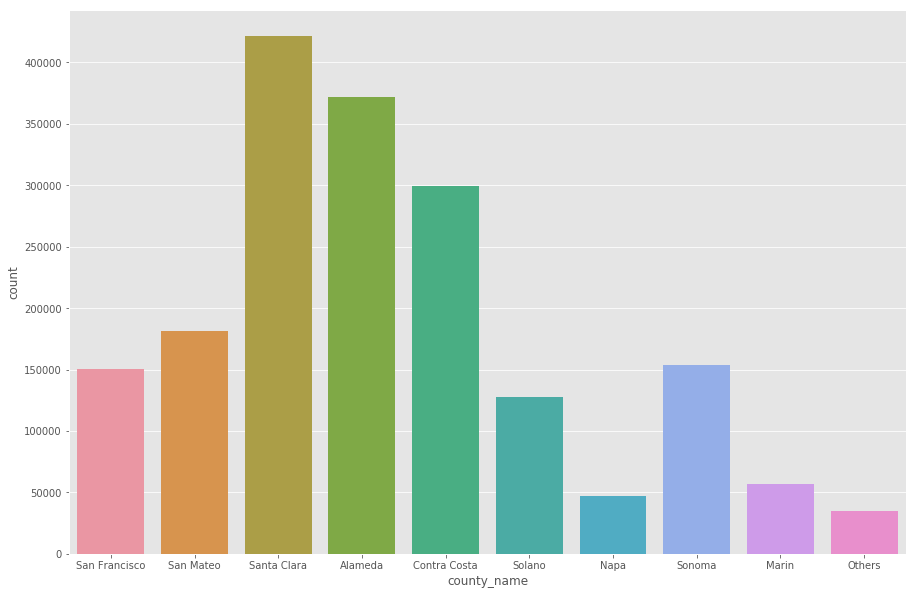

In [36]:
#count plot of number of transportation accessible buildings by county
plt.figure(figsize=(15, 10))
sns.countplot(x="county_name", data = clean_green_buildings_2015)

1. What regions are more heavily impacted by the lack of transportation access?
we can look at the counts of buildings that are accessible by transportation at taz and county levels
which regions, at the taz and county level are not accessible by transportaiton
what types of transportation connect these buildings



- we can see that, as expected, the counties of 

# Income/Rent/House Prices and Transportation

In [54]:
clean_green_buildings_2015.columns

Index(['building_id', 'parcel_id', 'residential_units', 'residential_sqft',
       'non_residential_sqft', 'building_sqft', 'stories', 'year_built',
       'redfin_sale_price', 'redfin_sale_year', 'building_type',
       'non_residential_rent', 'deed_restricted_units', 'residential_price',
       'price_per_sqft', 'lot_size_per_unit', 'vacant_residential_units',
       'combo_logsum', 'juris_ave_income', 'sqft_per_job', 'unit_price',
       'vacant_job_spaces', 'vacant_res_units', 'building_age', 'tmnode_id',
       'new_construction', 'cnml', 'transit_type', 'vmt_res_cat', 'node_id',
       'modern_condo', 'cml', 'taz', 'general_type', 'job_spaces', 'historic',
       'is_sanfran', 'sqft_per_unit', 'county_name', 'county_value',
       'subregion_name', 'subregion_value'],
      dtype='object')

In [53]:
clean_green_buildings_2015[clean_green_buildings_2015["redfin_sale_price"].isnull()].shape[0] /clean_green_buildings_2015.shape[0]

0.4098843751643862

40.9% of buildings do not have redfin sale prices

In [70]:
clean_green_buildings_2015[clean_green_buildings_2015["redfin_sale_year"].isnull()].shape[0] /clean_green_buildings_2015.shape[0]

0.0

all buildings have a redfin sale year

In [61]:
clean_green_buildings_2015[clean_green_buildings_2015['residential_price'].isnull()].shape[0] /clean_green_buildings_2015.shape[0]

0.08028444978554551

8% of buildings do not have residential prices

In [62]:
clean_green_buildings_2015[clean_green_buildings_2015["non_residential_rent"].isnull()].shape[0] /clean_green_buildings_2015.shape[0]

0.0

In [71]:
clean_green_buildings_2015[clean_green_buildings_2015["non_residential_rent"] >0].shape[0] /clean_green_buildings_2015.shape[0]

0.04770710761119556

Only 4% of buildings have a non residential rent over 0.  This either tells us that most of the buildings are residential and wouldn't have a nonresidential rent, and therefore are listed as 0, or that we do not have enough data.

## Given that the 3 categories per type of transit line denote distance from a building, we can look at correlations between transit types and rent prices

In [72]:
clean_green_buildings_2015["transit_type"].unique()

array(['b3', 'none', 'bart3', 'lrt2', 'b2', 'b1', 'bart1', 'brt1', 'cr4',
       'brt3', 'lrt3', 'lrt1', 'cr2', 'brt2', 'bart2', 'cr3'],
      dtype=object)

In [1]:
close_lines = ["bart1", "brt1", "cr2", "lrt1"]
medium_lines = ["bart2", "brt2", "cr3", "lrt2"]
far_lines = ["bart3", "brt3", "cr4", "lrt3"]

In [ ]:
#close lines scatter plot
clean_green_buildings_2015[clean_green_buildings_2015["transit_type"].isin(close_lines)]